# Cat Dog

- previously we use some dataset

- so it's easy because they all come in the same shape....

- today we gonna have a custom dataset from real folders....

- later on, we gonna use torchvision.ImageFolder

- so today, we gonna learn

1. preprocessing
2. loading images from folders
3. using pre-trained models
    1. pre-trained models are models that people trained the model on large number of images, so we can reuse the model's trained weights - e.g., resnet

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Let's Learn about preprocessing 

## Diaplay Image
- use Pillow
- use python 'os' to walk through the url path

In [2]:
import os #mostly funcitons related to path and folders
from PIL import Image #Pilow is a friendly library for handling images
from IPython.display import display #to help us display image.... #maybe plt.imshow

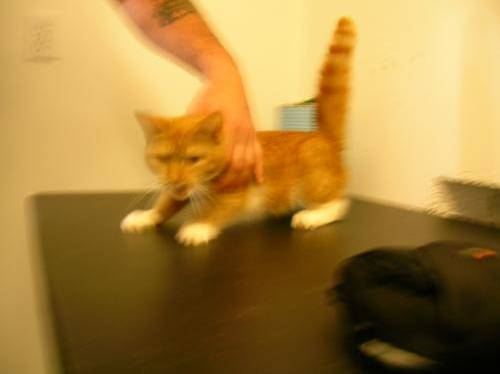

In [3]:
with Image.open('../data/cat_dog/train/cat/0.jpg') as im:
    display(im) #display is for any images....

In [4]:
#so if we want to display all images, we need to know the filenames...
#so here we can use 'os'
path = '../data/cat_dog/'

In [5]:
#so if we want to display all images, we need to know the filenames...
#so here we can use 'os'
path = '../data/cat_dog/'


imagenames = []
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        imagenames.append(folder+"/"+img)
    
imagenames[:5]

['../data/cat_dog/test\\cat/.DS_Store',
 '../data/cat_dog/test\\cat/10000.jpg',
 '../data/cat_dog/test\\cat/10001.jpg',
 '../data/cat_dog/test\\cat/10002.jpg',
 '../data/cat_dog/test\\cat/10003.jpg']

## Let's created a DataFrame to check the statistics of the size...

In [6]:
img_sizes = []
rejected_image = []
#i believe there are some invalid images....
#to fix UnidentifiedImageError, we need to use try and catch and except
for image in imagenames:
    try:
        with Image.open(image) as im:
            img_sizes.append(im.size)
    except:
        rejected_image.append(image)
        
print(img_sizes[:5])
print(len(rejected_image))
print(rejected_image[:5])

[(431, 359), (500, 374), (499, 471), (499, 375), (320, 239)]
25011
['../data/cat_dog/test\\cat/.DS_Store', '../data/cat_dog/test\\dog/.DS_Store', '../data/cat_dog/train\\cat/.DS_Store', '../data/cat_dog/train\\dog/.DS_Store', '../data/cat_dog/__MACOSX\\cat_dog/._.DS_Store']


In [7]:
img_sizes[0] #is a tuple, so we can create a dataframe

(431, 359)

In [8]:
df = pd.DataFrame(img_sizes,columns = ['Width','Height'])
df.head()

,Width,Height
0,431,359
1,500,374
2,499,471
3,499,375
4,320,239


In [9]:
#let's try to make sense with Chaky is trying to do
#later on, Ihave to decide which image size I will use
#I cannot simply use different sizes
#otherwise, my neural network will not work properly
print(df['Width'].describe())
print(df['Height'].describe())

count    25000.00000
mean       404.09904
std        109.03793
min         42.00000
25%        323.00000
50%        447.00000
75%        499.00000
max       1050.00000
Name: Width, dtype: float64
count    25000.000000
mean       360.478080
std         97.019959
min         32.000000
25%        301.000000
50%        374.000000
75%        421.000000
max        768.000000
Name: Height, dtype: float64


## Transformations

(499, 375)


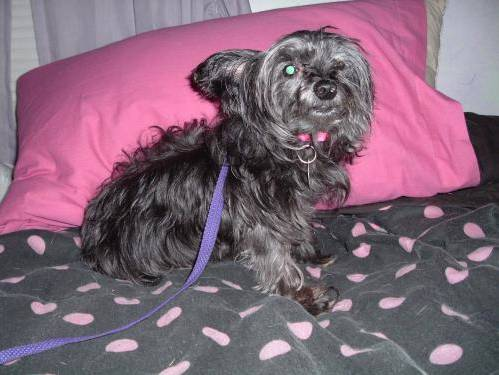

In [10]:
dog = Image.open('../data/cat_dog/train/dog/0.jpg')
print(dog.size)
display(dog)

In [11]:
#getpixel
r,g,b = dog.getpixel((0,0))
print(r,g,b)

115 113 124


### ToTensor

In [27]:
#let's learn about normalization
#Compose is basically allowing you to combine many transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

In [28]:
type(dog)

PIL.JpegImagePlugin.JpegImageFile

In [29]:
print(dog.size) #W,H for pillow

(499, 375)


In [30]:
im = transform(dog)
type(im) #so you can see now that im is now a tensor

torch.Tensor

In [18]:
print(im.shape) #C,H,W for pyTorch

torch.Size([3, 375, 499])


In [41]:
im = im.permute((1,2,0)) #for plt.imshow(H,W,C)
im.shape

torch.Size([499, 375, 3])

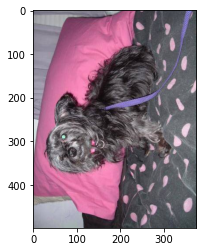

In [42]:
plt.imshow(im)

In [43]:
#so previously the pixe r g b =  115 113 124
im[0,0,:]
#now after ToTensor, out valeius becomes [0.4510, 0.4431, 0.4863]

tensor([0.4510, 0.4431, 0.4863])

In [44]:
115/255, 113/255, 124/255

(0.45098039215686275, 0.44313725490196076, 0.48627450980392156)

### Resize

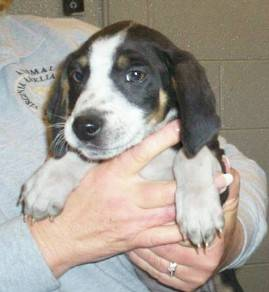

(269, 292)

In [49]:
small_dog = Image.open('../data/cat_dog/train/dog/10.jpg')
display(small_dog)
small_dog.size

tensor([0.5686, 0.4784, 0.2667])

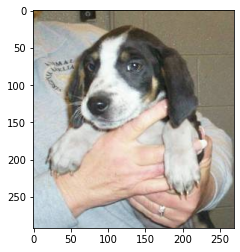

In [86]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)
im[0,0,:]

torch.Size([651, 600, 3])

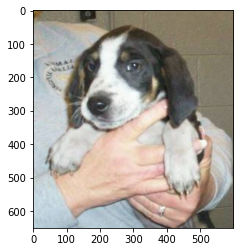

In [56]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(600)
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)
im.shape #why 651,600 --> if height > width, then image will be rescaled to (size * height / width, size).

torch.Size([600, 600, 3])

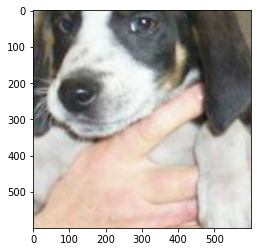

In [61]:
#very common technique to xoom in something you want
#but becareful 
transform = transforms.Compose([
    transforms.Resize(1000),
    transforms.CenterCrop(600),
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)
im.shape

torch.Size([292, 269, 3])

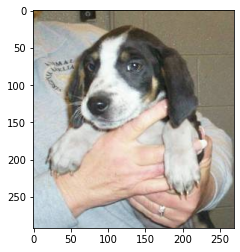

In [69]:
#why we need this randomicity??
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)
im.shape

torch.Size([224, 224, 3])

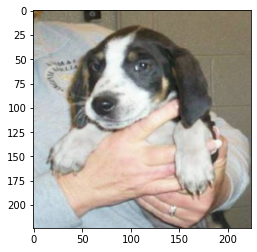

In [76]:
transform = transforms.Compose([
    transforms.RandomRotation(30), #p=0.5
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)
im.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([292, 269, 3])

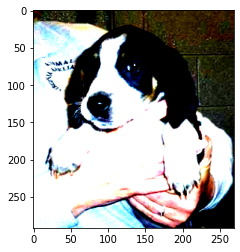

In [81]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)
im.shape

In [82]:
#originally : [0.5686, 0.4784, 0.2667] 
# After Normalizrtion : [ 0.3652, 0.1001, -0.6193]
im[0,0,:]

tensor([ 0.3652,  0.1001, -0.6193])

In [92]:
#format : numbe - mean /std
# mean of r,g,b  [0.485, 0.456, 0.406]
# std of r,g,b   [0.229, 0.224, 0.225]

(0.5686 - 0.485)/0.229 , (0.4784 - 0.456)/0.224,  (0.2667- 0.406)/0.225

#question, how do you know what normalization to use??
#we data scientist don't know, the image experts will tell us!!
#if not, just use ToTensor()
#1. listen the domain expert
#2. after ToTensor(), you can get the mean r g b, adn also std r g b, and use that to normalize

(0.3650655021834061, 0.0999999999999999, -0.6191111111111113)

So yay! We learn the basic preprocessing provied by pyTorch

The next thing we gonna do is load these images, 

do some preprocessing then do some neural network

Break: 16:30- 16:45

Why normalization? For stability where training neural network.next
If you want to normalize based on mean/std --> 'torchvision.transforms.Normalizer()'

## Let's do deep learning!!

In [93]:
#define the transfotrms for train and test
#before I rachf you the transforms, you need to learn offline and line augmenttations

#offline augmentations - so you bascially manually rotate/flip/crop and add
#those images to your original dataset, hence the dataset size increase
#NOT RECOMMENDED - beacuse your size of dataset will increase!

#online augmentations - on every batch, you perform rotate/flip/crop randomly (using probability)
#and this naturally asking your model to model these model changes
#RECOMMENDED - because your size of data set will not increase!
#LUCKILY - by simple putting transforms inside the dataset, it will be automatically for images

## 1.ETL

In [96]:
#ideas is for training, we gonna have online augmentations
train_transform = transforms.Compose([
    transforms.RandomRotation(10), #why 10 I don't know!
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224), #so the shortest size will 224
    transforms.CenterCrop(224), #so the longest side will be 224
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])
#for testin, NO augmentations!!
test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

#Why RandomRotation??, RandomHorizontalFlip??

In [99]:
#set the ImageFolder
#ImageFolder : 
'''
root/dog/xxx.png
root/dog/xxy.png
root/dog/[..]/xxz.png
root/cat/123.png
root/cat/nsdf3.png
root/cat/[..]/asd932_.png
'''

root = '../data/cat_dog/'
train_path = os.path.join(root,'train')
test_path = os.path.join(root,'test')
print(train_path, test_path)

train_data = datasets.ImageFolder(train_path, transform=train_transform)
test_data = datasets.ImageFolder(test_path, transform=test_transform)
#actually, best practice is that you nned validation data, but today let's keep simple

../data/cat_dog/train ../data/cat_dog/test


In [102]:
#when you use ImageFolder, the class_name are automatically extracted
#based on the folder structure
train_data.classes

['cat', 'dog']

In [103]:
len(train_data), len(test_data)

(18002, 6998)

In [100]:
#create Dataloader
torch.manual_seed(9999) #you can put this in the top....
batch_size = 32
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle=False)

## 2.EDA
- Display 10 images using 'make_grid'
    - you don't have to sort

In [104]:
for images, labels in train_loader:
    break

images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [107]:
#can you dispkay 10 imageds for me using make_grid()
images = images[:10]
labels = labels[:10]

0 1 0 1 1 0 1 1 0 1
cat dog cat dog dog cat dog dog cat dog


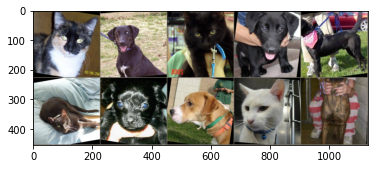

In [118]:
from torchvision.utils import make_grid

print(*(labels.numpy()))
print(*[train_data.classes[label] for label in labels])

#display 10 images

im = make_grid(images, nrow=5) 

#denormalize the images....
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

im_inv = inv_normalize(im)

im_inv = im_inv.permute((1,2,0)) 
plt.imshow(im_inv)

In [121]:
images.shape

torch.Size([10, 3, 224, 224])

## 3. Defining the model

In [140]:
#define a neural network

#conv2d(3 ->6 -> 16) #after each conv, put a relu then follow by maxpool(2,2)
#linear(? -> 120 -> 84 -> 2) #for the first two linear layers, put a relu after

class CatandDogCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.max_pool2d = nn.MaxPool2d(2,2)
        self.linear1 = nn.Linear(54*54*16,120)
        self.linear2 = nn.Linear(120,84)
        self.linear3 = nn.Linear(84,2)

    def forward(self, X):
        X = F.relu(self.conv1(X)) #out_size = (224 - 3) / 1 + 1 = 222
        X = F.max_pool2d(X, 2, 2)  #maxpool 222/2 = 111
        X = F.relu(self.conv2(X)) #out_size = (111 - 3) / 1 + 1 = 109
        X = F.max_pool2d(X, 2, 2) #maxppol 109/2 = 54
        X = X.view(-1, 54*54*16)
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return X


In [130]:
#test your model
#get a image
#try your run your model!!!

In [131]:
torch.manual_seed(101)
CNNmodel  = CatandDogCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)

## 4. Training!!!

In [ ]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

## Appendix : using a pre-trained model

Idea : Pre-trained model is model weights in which some people have trained on a very huge dataset! So why not we borrow their weights!! And jsut train the last layer which is the 2 neurons - cat and dogs

In [141]:
from torchvision import models
from torchvision.models import AlexNet_Weights

In [144]:
alexnet = models.alexnet(weights = AlexNet_Weights.IMAGENET1K_V1)
# alexnet #first over convolutional neural network for imagenet!

In [147]:
#idea is that I want to use its weights
#idea is that I don't want to destroy these weights
#idea is that I want to freeze these weight
for param in alexnet.parameters():
    param.requires_grad=False #this is essentially freezing all the weights

#but then I want to addd one more layer
alexnet.classifier = nn.Sequential(
    nn.Linear(9216,1024), #why like this? Because Chaky tried already....
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024,2),
    )

In [ ]:
#you can go out home and try alexnet
#do the real training
#don't worry that the original Alexnet is gone. 